In [1]:
import numpy as np
import pandas as pd

Importing Data

In [2]:
import pandas as pd

crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Questions about data

In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Exploring Data

In [8]:
import pandas as pd
# Exclude non-numeric columns from correlation computation
numeric_crop = crop.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_crop.corr()
print(corr)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<Axes: >

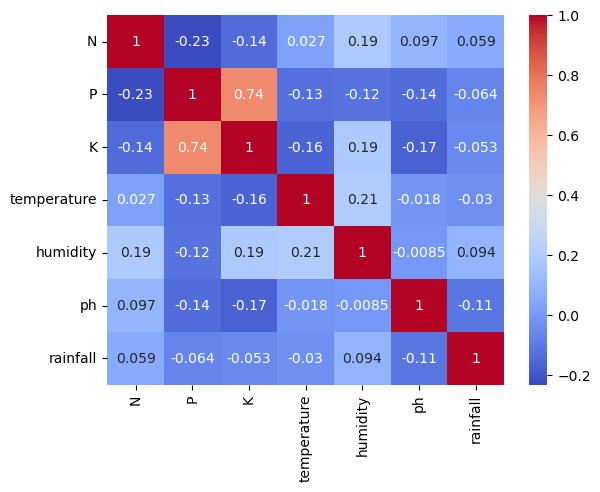

In [9]:
import seaborn as sns
sns.heatmap(corr,annot = True,cbar = True,cmap = 'coolwarm')

In [10]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

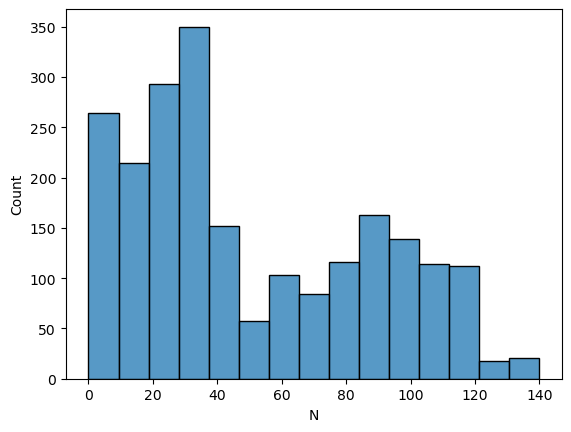

In [11]:
import matplotlib.pyplot as plt
sns.histplot(crop['N'])
plt.show()

Encoding

In [12]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

In [25]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [26]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


Train Test Split

In [27]:
x = crop.drop('crop_num',axis = 1)
y = crop['crop_num']

In [28]:
x.shape

(2200, 7)

In [29]:
y.shape

(2200,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [32]:
x_train.shape

(1760, 7)

In [33]:
x_test.shape

(440, 7)

Scale the features using MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [35]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

Standarization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [37]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

Training Models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are defined

# Create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision-Tree': DecisionTreeClassifier(),
    'Random-Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}

# Iterate over models
for name, md in models.items():
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)
    print(f"{name} with accuracy : {accuracy_score(y_test, y_pred)}")


Logistic Regression with accuracy : 0.9636363636363636
Naive Bayes with accuracy : 0.9954545454545455
Support Vector Machine with accuracy : 0.9681818181818181
K-Nearest Neighbors with accuracy : 0.9590909090909091
Decision-Tree with accuracy : 0.9886363636363636
Random-Forest with accuracy : 0.9931818181818182
Bagging with accuracy : 0.9863636363636363
AdaBoost with accuracy : 0.1409090909090909
Gradient Boosting with accuracy : 0.9818181818181818
Extra Trees with accuracy : 0.8954545454545455


Predictive System

In [40]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = md.predict(x_test)
accuracy_score(y_test,y_pred)

0.8954545454545455

In [62]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = rfc.predict(features).reshape(1, -1)
    return prediction[0]


In [72]:
N = 0
P = 0
K = 0
temperature = 0
humidity = 0
ph = 0
rainfall = 0

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

crop_dict = {
    1: 'rice',
    2: 'maize',
    3: 'jute',
    4: 'cotton',
    5: 'coconut',
    6: 'papaya',
    7: 'orange',
    8: 'apple',
    9: 'muskmelon',
    10: 'watermelon',
    11: 'grapes',
    12: 'mango',
    13: 'banana',
    14: 'pomegranate',
    15: 'lentil',
    16: 'blackgram',
    17: 'mungbean',
    18: 'mothbeans',
    19: 'pigeonpeas',
    20: 'kidneybeans',
    21: 'chickpea',
    22: 'coffee'
}

if predict[0] in crop_dict:  # Removed [0] as predict is not an array
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated".format(crop))
else:
    print("Sorry, the system is not able to recommend a proper crop for the environment")

papaya is the best crop to be cultivated


In [43]:
import joblib

In [51]:
joblib.dump(rfc,'model_joblib_rfc')

['model_joblib_rfc']

In [52]:
model=joblib.load('model_joblib_rfc')

In [82]:
prediction=model.predict([[0,0,0,0.0,0,0,0]])

In [83]:
if prediction[0] in crop_dict:
    predicted_crop = crop_dict[prediction[0]]
    print(predicted_crop)

papaya
